# その他のデータフレーム操作

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

### DataFrame を array に変換する例です。

In [2]:
data = {'City': ['Tokyo', 'Osaka', 'Nagoya', 'Okinawa'],
                 'Temperature': [25.0, 28.2, 27.3, 30.9],
                 'Humidity': [44, 42, np.nan, 62]}
cities = DataFrame(data)
cities

,City,Temperature,Humidity
0,Tokyo,25.0,44.0
1,Osaka,28.2,42.0
2,Nagoya,27.3,NaN
3,Okinawa,30.9,62.0


In [3]:
cities.values

array([['Tokyo', 25.0, 44.0],
       ['Osaka', 28.2, 42.0],
       ['Nagoya', 27.3, nan],
       ['Okinawa', 30.9, 62.0]], dtype=object)

### Series を array に変換する例です。

In [4]:
cities['City'].values

array(['Tokyo', 'Osaka', 'Nagoya', 'Okinawa'], dtype=object)

### トランプのカードを集めた DataFrame を定義して、カードのシャッフルを行う例です。

In [5]:
face = ['king', 'queen', 'jack', 'ten', 'nine', 'eight',
        'seven', 'six', 'five', 'four', 'three', 'two', 'ace']

suit = ['spades', 'clubs', 'diamonds', 'hearts']

value = range(13, 0, -1)

deck = DataFrame({'face': np.tile(face, 4),
                  'suit': np.repeat(suit, 13),
                  'value': np.tile(value, 4)})

deck.head()

,face,suit,value
0,king,spades,13
1,queen,spades,12
2,jack,spades,11
3,ten,spades,10
4,nine,spades,9


permutation 関数で、index の順番をランダムにシャッフルします。

In [6]:
np.random.permutation(deck.index)

array([ 4, 34, 47, 21,  6, 48, 28, 49, 33, 12, 40, 36, 20, 39,  2, 11,  9,
       14, 10, 35,  3, 17, 50, 43, 26, 44, 30, 37, 45,  0, 41, 15, 16, 38,
       46, 27,  1, 13, 25, 29, 32,  7, 51,  8, 18, 22, 23, 19,  5, 31, 24,
       42])

ランダムにシャッフルした index を用いて行を並べ替えます。

In [7]:
deck = deck.reindex(np.random.permutation(deck.index))
deck.head()

,face,suit,value
15,jack,clubs,11
23,three,clubs,3
26,king,diamonds,13
4,nine,spades,9
44,eight,hearts,8


reset_index メソッドで index に通し番号を付け直します。

In [8]:
deck = deck.reset_index(drop=True)
deck.head()

,face,suit,value
0,jack,clubs,11
1,three,clubs,3
2,king,diamonds,13
3,nine,spades,9
4,eight,hearts,8


### DataFrame のグラフ描画機能を使用する例です。

3回分のランダムウォークのデータを並べた DataFrame を作成します。

In [9]:
result = DataFrame()
for c in range(3):
    y = 0
    t = []
    for delta in np.random.normal(loc=0.0, scale=1.0, size=100):
        y += delta
        t.append(y)
    result['Trial %d' % c] = t

result.head()

,Trial 0,Trial 1,Trial 2
0,1.573318,0.378294,0.792149
1,1.332979,0.449881,-0.092584
2,3.808831,0.541048,0.138249
3,4.280638,1.615452,-0.786015
4,4.128635,0.501012,-1.559777


DataFrame の polot メソッドでグラフを描きます。

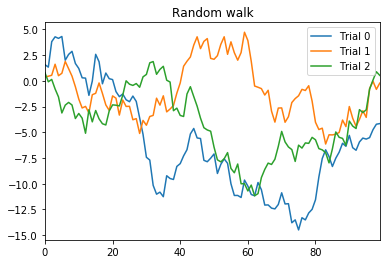

In [10]:
result.plot(title='Random walk')